# NumPy

This course introduces NumPy for scientific computing.

# Part 3: Sorting, searching, statistics and linear algebra

In this part you learn how to use NumPy for statistics and line algebra.

### Sorting, searching and counting

These operation are fundamental in computer science at large and scientific computing as well. Hence, NumPy provides specialized and optimized functions and routines. A comprehensive list can be found here: <https://numpy.org/doc/stable/reference/routines.sort.html>

In [2]:
import numpy as np

x = np.arange(6, 0, -1).reshape(2, 3)
print(x)

# sort elements along an axis
print(np.sort(x))  # default axis is -1
print(np.sort(x, axis=0))

# get indeces that would sort an array
print(np.argsort(x))

print("=="*10)
print(x)
print("--"*10)
# find the index of the minimum value
print(np.argmin(x))  # default to index in flattended array
print(np.argmin(x, axis=-1)) # get index along an axis, returns a 1 dimensional array
print(np.argmin(x, axis=-1, keepdims=True)) # keep the dimensions of the input for the indices

[[6 5 4]
 [3 2 1]]
[[4 5 6]
 [1 2 3]]
[[3 2 1]
 [6 5 4]]
[[2 1 0]
 [2 1 0]]
[[6 5 4]
 [3 2 1]]
--------------------
5
[2 2]
[[2]
 [2]]


As seen in the last example, many function names in NumPy have a version with an `arg` prefix. This indicates returning the result as indices, while the normal functions return values. This is useful in combination with advanced indexing and assignment patterns introduced in the previously.

Another common parameter for many NumPy functions to be aware of is `axis`. It defines along which axis respective dimension of an ndarray a function is computed.

### Statistics

NumPy offers some descriptive statistics routines to calculate for example mean, percentiles, correlations and historgramms. For a more complete list see <https://numpy.org/doc/stable/reference/routines.statistics.html>


In [ ]:
x = np.arange(9).reshape(3,3)
print(x)

# get the sum
print(np.sum(x))

# get the mean
print(np.mean(x))

# get the median of each row
print(np.median(x, axis=0))

# get the median of each column
print(np.median(x, axis=1))

a = np.random.rand(10)
print(np.var(a))  # variance
print(np.std(a))  # standard deviation

### Linear Algebra - Matrix Multiplication

Matrix multiplication is now easy. And many other linear algebra things, see <https://numpy.org/doc/stable/reference/routines.linalg.html>

In [ ]:
x1 = np.array([1, 1])
x2 = np.array([2, 2])

# matrix multiplication
y = np.matmul(x1, x2)  # same as `x1 @ x2`
print(y)

# dot product
y2 = np.dot(x1, x2)
print(y2)

### An Exmple

Given some points in eucledian space, lets do a translation with an [affine transformation](https://en.wikipedia.org/wiki/Affine_transformation) and homogeneous coordinates, defined as follows: 

$$
\begin{bmatrix} x'\\ y'\\ 1 \end{bmatrix} = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \\ 0 & 0 & 0 \end{bmatrix} \begin{bmatrix} x \\ y\\ 1 \end{bmatrix}
$$

where $t_x$ and $t_y$ are the offset along the x respectively y axis.

In [11]:
import numpy as np

# create some points
points = np.array([[0, 0], [1, 1], [3, 4], [7, 6]], np.float64)
print("input coordinates:\n", points)
print("shape:", points.shape)

# define transformation
affine = np.eye(3)  # identity
affine[0, 2] = 10  # t_x = 10
affine[1, 2] = -1  # t_y = -1
print("affine:\n", affine)

# make homogeneous
homogeneous = np.hstack((points, np.ones(points.shape[0]).reshape(-1, 1)))
print("homogeneous coordinates:\n", homogeneous)

# transform
transformed = np.matmul(affine, np.transpose(homogeneous)).T
print("transformed coordinates:\n", transformed)

# drop last column / wrong in general
print("result:\n", transformed[:, :-1])

# correct for all affine matrices: divide by last column value
### last column
print("=="*80)
transformed[:,-1] = 2
print("z",transformed[:,-1])
print("x before ",transformed[:,0])

x = transformed[:,0] / transformed[:,-1]
print("x after",x )

input coordinates:
 [[0. 0.]
 [1. 1.]
 [3. 4.]
 [7. 6.]]
shape: (4, 2)
affine:
 [[ 1.  0. 10.]
 [ 0.  1. -1.]
 [ 0.  0.  1.]]
homogeneous coordinates:
 [[0. 0. 1.]
 [1. 1. 1.]
 [3. 4. 1.]
 [7. 6. 1.]]
transformed coordinates:
 [[10. -1.  1.]
 [11.  0.  1.]
 [13.  3.  1.]
 [17.  5.  1.]]
result:
 [[10. -1.]
 [11.  0.]
 [13.  3.]
 [17.  5.]]
z [2. 2. 2. 2.]
x before  [10. 11. 13. 17.]
x after [5.  5.5 6.5 8.5]


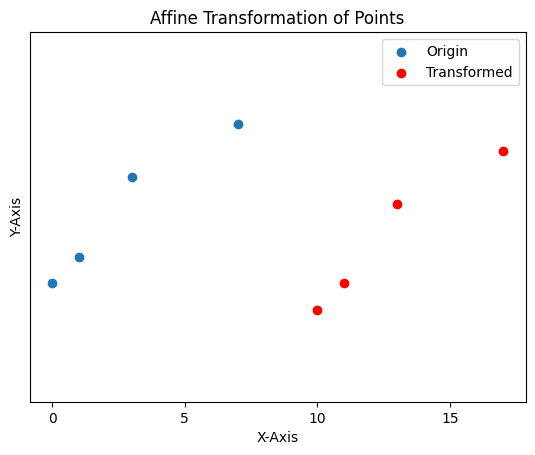

In [35]:
from matplotlib import pyplot as plt
#plt.plot(points[:,0],points[:,1])
plt.scatter(points[:,0],points[:,1])
plt.scatter(transformed[:,0],transformed[:,1],c="red")
plt.title("Affine Transformation of Points")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.xticks([5*x for x in range(10)])
plt.yticks([])
plt.xlim([-5,30])
plt.ylim([-5,15])
#plt.axis("equal")
plt.legend(labels = ["Origin","Transformed"])
plt.savefig("thesis.png")#, dpi=1200)
plt.show()

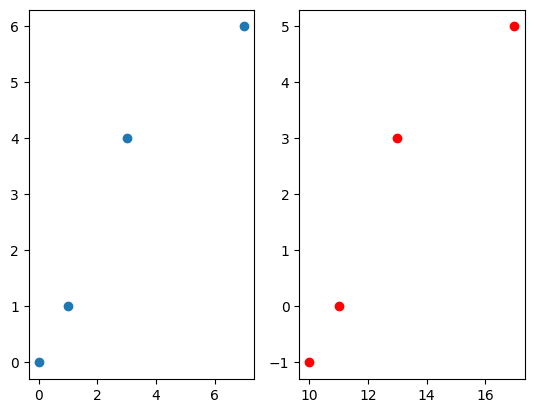

In [38]:
plt.subplot(121) # rows, columns, index
plt.scatter(points[:,0],points[:,1])
plt.subplot(122) # rows, columns, index
plt.scatter(transformed[:,0],transformed[:,1],c="red")
plt.show()